In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'IRIS.csv']


## Iris flower dataset

In [2]:
# The following notebook uses Support Vector Machines on the famous Iris dataset.
# This dataset was introduced by the British statistician and biologist Sir Ronald Fisher 
# in his 1936 paper The use of multiple measurements in taxonomic problems

# This dataset is openly available at UCI Machine Learning Repository

In [3]:
#The iris dataset contains measurements for 150 iris flowers from three different species.

#The three classes in the Iris dataset:

#    Iris-setosa (n=50)
#    Iris-versicolor (n=50)
#    Iris-virginica (n=50)

# The four features of the Iris dataset:

#    sepal length in cm
#    sepal width in cm
#    petal length in cm
#    petal width in cm

## Get the data

#**Use seaborn to get the iris data by using: iris = sns.load_dataset('iris') **

## Importing important libraries first

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Import the dataset using Seaborn library
iris=pd.read_csv('input/IRIS.csv')

In [6]:
# Checking the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


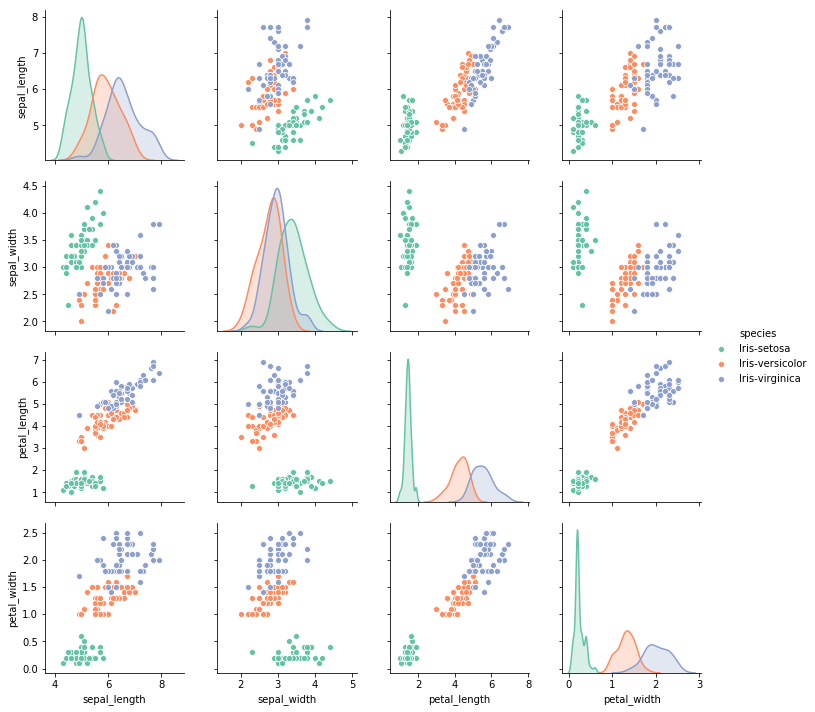

In [7]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=iris, hue='species', palette='Set2')

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Separating the independent variables from dependent variables
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

## Training and Fitting the model

In [10]:
from sklearn.svm import SVC
model=SVC()

In [11]:
model.fit(x_train, y_train)


/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
def svm_function(x,y):
    #initilizing weight
    w = np.zeros(len(x[0]))
    #initialize learning rate
    l_rate = 1
    #epoch
    epoch = 100000
    #output list
    out = []
    #training svm
    for e in range(epoch):
        for i, val in enumerate(x):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    
    for i, val in enumerate(x):
        out.append(np.dot(x[i], w))
    
    return w, out

In [13]:
model=svm_function(x_train, y_train)

KeyError: 0

## Predictions from the trained model

In [ ]:
pred=model.predict(x_test)

## Model Evaluation

In [ ]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

In [15]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.94      1.00      0.97        17

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

